# Logistic regression following the blog below  

http://blog.yhat.com/posts/logistic-regression-python-rodeo.html

In [113]:
import numpy as np, pandas as pd
import statsmodels.api as sm
import pylab as py

df= pd.read_csv('collegeadmissions.csv')

In [114]:
df.columns  = ['admit', 'gre','gpa','prestige']
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [73]:
df.describe()
pd.crosstab(df.admit, df.prestige)

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


,gre,gpa,prestige
admit,,,
0,573.186813,3.343700,2.641026
1,618.897638,3.489213,2.149606


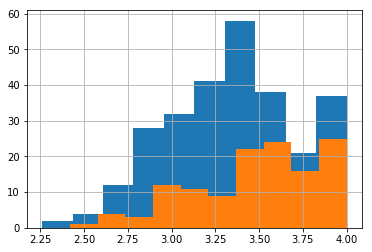

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
df.groupby('admit').gpa.hist()
df.groupby('admit').mean()


admit
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: gre, dtype: object

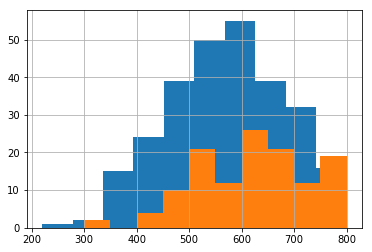

In [97]:
df.groupby('admit').gre.hist()

admit
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: prestige, dtype: object

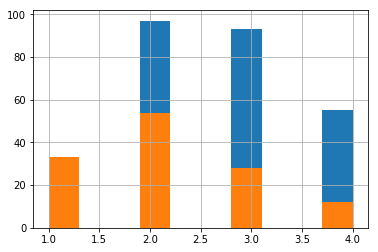

In [107]:
df.groupby('admit').prestige.hist()

In [123]:
#Create dummies for prestige
dum = pd.get_dummies(df['prestige'], prefix='prestige')

# df.head()
cols_to_keep = ['admit','gre','gpa']
data = df[cols_to_keep].join(dum.ix[:,'prestige_2':])
data['intercept'] =1.0 # adds new column and populates with 1

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0


In [129]:
#check for correlation with outcome
data.corr().admit
#multicolinearity
data.corr()


,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
admit,1.000000,0.184434,0.178212,0.067109,-0.121800,-0.133356,NaN
gre,0.184434,1.000000,0.384266,0.056202,-0.073200,-0.068235,NaN
gpa,0.178212,0.384266,1.000000,-0.057867,0.074490,-0.084428,NaN
prestige_2,0.067109,0.056202,-0.057867,1.000000,-0.512837,-0.349304,NaN
prestige_3,-0.121800,-0.073200,0.074490,-0.512837,1.000000,-0.295397,NaN
prestige_4,-0.133356,-0.068235,-0.084428,-0.349304,-0.295397,1.000000,NaN
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
train_cols = data.columns[1:]
logit =sm.Logit(data['admit'],data[train_cols]) #using logit function from statsmodels.
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [134]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Fri, 14 Apr 2017   Pseudo R-squ.:                 0.08292
Time:                        15:07:17   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
prestige_2    -0.6754      0.316     -2.134      0.033        -1.296    -0.055
prestige_3    -1.3402      0.345     -3.881      0.000        -2.017    -0.663
prestige_4    -1.5515      0.418     -3.713      0.000        -2.370    -0.733
intercept     -3.9900      1.140     -3.500      0.000        -6.224    -1.756
==============================================================================
"""

In [135]:
print(result.conf_int())
#we can be 95% sure that values will be between the following intervals...
#prestige 2 to 4 is negatively corrlated with admit.

                   0         1
gre         0.000120  0.004409
gpa         0.153684  1.454391
prestige_2 -1.295751 -0.055135
prestige_3 -2.016992 -0.663416
prestige_4 -2.370399 -0.732529
intercept  -6.224242 -1.755716


In [136]:
## ODDS RATIO 
# Take the exponent of each coefficient to generate the odds ratio. This tells you how a 1 unit increase/ decrease effects the 
# odds of being admitted.
# eg/ the odds of being admitted decrease by 50% if the prestige of the school is 2.
np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64

In [149]:
# odds ratios and 95% CI
params = result.params # coefficients 
conf = result.conf_int()
conf['OR'] = params #add column 'OR' which contains coefficients 
conf.columns = ['2.5%', '97.5%', 'OR'] #rename confidence int 1 as 2.5%, and conf int 2 as 97.5%
print(np.exp(conf)) #apply exponents to all columns 

                2.5%     97.5%        OR
gre         1.000120  1.004418  1.002267
gpa         1.166122  4.281877  2.234545
prestige_2  0.273692  0.946358  0.508931
prestige_3  0.133055  0.515089  0.261792
prestige_4  0.093443  0.480692  0.211938
intercept   0.001981  0.172783  0.018500


# Testing the model

In [168]:
data['predict'] = result.predict(data[train_cols])

In [180]:
# instead of generating all possible values of GRE and GPA, we're going
  # to use an evenly spaced range of 10 values from the min to the max
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print (gres)
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print (gpas)


[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [181]:
def xrange(x,y): # manually create xrange as it doesn't exist in python 3
    return iter(range(x,y))

#define the cartesian function
def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype
    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)
        m = n / arrays[0].size
        out[:,0] = np.repeat(arrays[0], m)
        if arrays[1:]:
            cartesian(arrays[1:], out=out[0:m,1:])
            for j in xrange(1, arrays[0].size):
                out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out



In [183]:
# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

# make predictions on the enumerated dataset
combos['admit_pred'] = result.predict(combos[train_cols])

print (combos.head())

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: Length mismatch: Expected axis has 1 elements, new values have 4 elements

TypeError: Empty 'DataFrame': no numeric data to plot

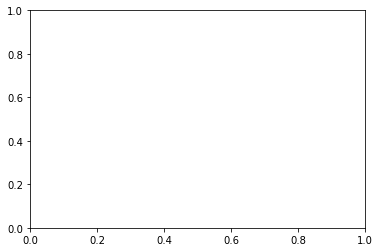

In [179]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']#, 'orange', 'brown']
for e, c in enumerate(colors): #loops over a list and assigns an index of 0 for false and 1 for True.
                                #so it creates a dummy variable blue 0, blue 1, green 0, green 1 etc 
                                #it returns 2 variable e = index ( 0 or 1) and c = colour
    data[data[train_cols[e]] == 1].plot(x='gpa', y='predict', kind='scatter', color = c, ax=ax)
                                #==1 tells us to only include observations that match the colour index.

In [174]:
data[data[train_cols[e]] == 1]

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept,predict


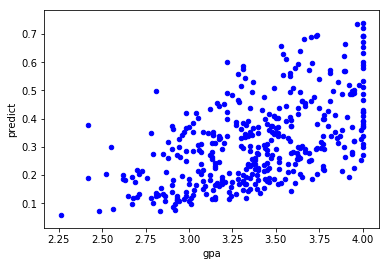

In [178]:
ax = plt.subplot(111)
data.plot(x='gpa', y='predict', kind='scatter', color = c, ax=ax)